In [6]:
%matplotlib inline
#%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual,Play
import ipywidgets as widgets
import matplotlib.colors as colors
import matplotlib as mpl
import pylab
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math
import os
import scipy.special as sp
import scipy.integrate as integrate
import scipy.misc as ms
from matplotlib import gridspec
from numpy import linalg as LA
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import warnings
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle, Circle
from scipy import optimize

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

from tqdm import tqdm

warnings.filterwarnings('ignore')

In [7]:

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 18,               # LaTeX default is 10pt font.
    #"text.fontsize": 18,
    "legend.fontsize": 16,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "pgf.preamble": [
        r"\usepackage{bm}",  
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}"
        ]
    }
mpl.rcParams.update(pgf_with_latex)


In [8]:
def x1_sol(t,m1,v1,xs1):
    return 2*np.arctan((m1-np.sqrt(v1*v1-m1*m1)*np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))))/v1)
def x2_sol(t,m2,v2,xs2):
    return 2*np.arctan((m2-np.sqrt(v2*v2-m2*m2)*np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))))/v2)
def x1_dot(t,m1,v1,xs1):
    return ((v1*v1-m1*m1) * np.power(1/np.cos(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))), 2))/(v1 * (1+ (np.power((m1-np.sqrt(v1*v1-m1*m1)*np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1)))) , 2)) / (v1*v1)))
def x2_dot(t,m2,v2,xs2):
    return ((v2*v2-m2*m2) * np.power(1/np.cos(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))), 2))/(v2 * (1+ (np.power((m2-np.sqrt(v2*v2-m2*m2)*np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2)))) , 2)) / (v2*v2)))
def x1_dotdot(t,m1,v1,xs1):
    return 2 * (-(np.power(v1*v1-m1*m1,2) * 1/np.power(np.cos(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))),4) * (m1-np.sqrt(v1*v1-m1*m1) * np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1)))) / (2*np.power(v1, 3)*(1+1/np.power(v1, 2)*(m1-np.sqrt(v1*v1-m1*m1)*np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))))))) - (np.power(v1*v1-m1*m1,3/2) * 1/np.power(np.cos(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))),2) * np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1)))) / (2*v1 * (1+ np.power(m1-np.sqrt(v1*v1-m1*m1)*np.tan(-1/2 * t * np.sqrt(v1*v1-m1*m1) - np.arctan((-m1*np.sqrt(v1*v1-m1*m1) + v1*np.sqrt(v1*v1-m1*m1) * np.tan(xs1/2))/(v1*v1-m1*m1))),2)/np.power(v1,2))))
def x2_dotdot(t,m2,v2,xs2):
    return 2 * (-(np.power(v2*v2-m2*m2,2) * 1/np.power(np.cos(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))),4) * (m2-np.sqrt(v2*v2-m2*m2) * np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2)))) / (2*np.power(v2, 3)*(1+1/np.power(v2, 2)*(m2-np.sqrt(v2*v2-m2*m2)*np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))))))) - (np.power(v2*v2-m2*m2,3/2) * 1/np.power(np.cos(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))),2) * np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2)))) / (2*v2 * (1+ np.power(m2-np.sqrt(v2*v2-m2*m2)*np.tan(-1/2 * t * np.sqrt(v2*v2-m2*m2) - np.arctan((-m2*np.sqrt(v2*v2-m2*m2) + v2*np.sqrt(v2*v2-m2*m2) * np.tan(xs2/2))/(v2*v2-m2*m2))),2)/np.power(v2,2))))

100%|█████████████████████████████████████████| 201/201 [01:10<00:00,  2.83it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


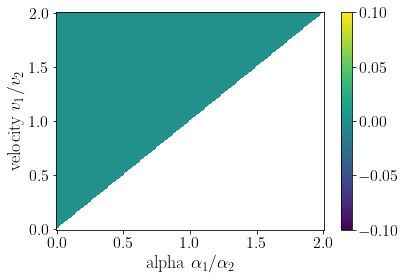

In [13]:
l_x1=np.pi/3
l_x2=np.pi/8
N_intervals = 200
v_ratio_max = 2.0
m_ratio_max = 2.0
interval=0.01

interval_v=v_ratio_max/N_intervals
interval_m=m_ratio_max/N_intervals
def catchtime(time):
    return x1_sol(time,l_m1,l_v1,l_x1)-x2_sol(time,l_m2,l_v2,l_x2)
def catchtime_prime(time):
    return x1_dot(time,l_m1,l_v1,l_x1)-x2_dot(time,l_m2,l_v2,l_x2)
def catchtime_prime2(time):
    return x1_dotdot(time,l_m1,l_v1,l_x1)-x2_dotdot(time,l_m2,l_v2,l_x2)
def catchpos(time):
    return x1_sol(time,l_m1,l_v1,l_x1)



# v1_list=np.arange(0.0,v_ratio_max+interval,interval)
# m1_list=np.arange(0.0,m_ratio_max+interval,interval)

v1_list=np.arange(0.0,v_ratio_max+interval_v,interval_v)
m1_list=np.arange(0.0,m_ratio_max+interval_m,interval_m)
# v1_list = np.linspace(0.0,v_ratio_max,int(v_ratio_max/N_intervals))
# m1_list = np.linspace(0.0,m_ratio_max,int(m_ratio_max/N_intervals))



x, y = np.meshgrid(m1_list, v1_list)
l_m2=1 
l_v2=1 

l_time=np.linspace(0,10000,10000)
z = np.zeros(np.shape(x))
k = 0
catch = 0

for i in tqdm(range(0,len(v1_list))):
    l_v1=v1_list[i]
    for j in range(0,len(m1_list)):
        l_m1=m1_list[j]
        
        # Catching Time
        k = 0
        catch = 0
        ct = np.absolute(catchtime(l_time))
        while k < len(l_time):
            if ct[i] < 0.01: 
                catch = l_time[i]
                break
            k += 1
        
        # Position
        xs3 = x1_sol(catch,l_m1,l_v1,l_x1)
        if not np.isnan(xs3):
            
            Number_of_crossings = int(xs3/(2.*np.pi))
            z[i,j] = Number_of_crossings
        else: 
            z[i,j] = np.nan
            
#         while xs3>2*np.pi:
#             xs1 -= 2*np.pi
#         if xs3<0:
#             xs3 += 2*np.pi
        
#         # Parameters
#         if xs3 > l_x1 and xs3 < np.pi:
#             z[i,j] = 1
#         #case caught 2
#         elif xs3 > np.pi and xs3 < 0:
#             z[i,j] = 2
#         #case caught 5
#         elif xs3 < l_x1 and xs3 > 0:
#             z[i,j] = 5
#         #case caught 6
#         else:
        
        
        

fig, ax = plt.subplots()
#plt.pcolormesh(x,y,z, cmap="tab10", vmin=1,vmax=10)
plt.pcolormesh(x,y,z, cmap="viridis")
plt.colorbar()

plt.legend(frameon=False)
plt.xlabel("alpha $\\alpha_1/\\alpha_2$")
plt.ylabel("velocity $v_1/v_2$")
#plt.savefig("testRegions.png", dpi=300, bbox_inches='tight')

plt.show()

